<a href="https://colab.research.google.com/github/michael0806/Front-end-Developer-Technical-Test/blob/master/baseline_model_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import os
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Lab 02/Final_property_census_data.csv")

In [3]:
df.head()

,Unnamed: 0,SA12018_code,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,...,SA22018_code,MB2018_code,MB2021_code,MB2022_code,CL_Latitude,CL_Longitude,CL_Bedrooms,CL_Bathrooms,Log_Sale_Price_Net,school_count
0,0,7001130,2.684211,0.58,0.42,41.423077,0.703125,0.265625,0.0,0.0,...,111800,438800,438800,438800,-36.173795,175.493763,-0.457969,0.177756,12.769965,2
1,1,7001130,2.684211,0.58,0.42,41.423077,0.703125,0.265625,0.0,0.0,...,111800,438800,438800,438800,-36.173795,175.493763,-0.457969,0.177756,12.810389,2
2,2,7001130,2.684211,0.58,0.42,41.423077,0.703125,0.265625,0.0,0.0,...,111800,438800,438800,438800,-36.178113,175.360303,-2.535410,-0.691360,12.842649,0
3,3,7001130,2.684211,0.58,0.42,41.423077,0.703125,0.265625,0.0,0.0,...,111800,438800,438800,438800,-36.177727,175.359824,-1.496689,0.177756,11.112448,0
4,4,7001130,2.684211,0.58,0.42,41.423077,0.703125,0.265625,0.0,0.0,...,111800,438800,438800,438800,-36.177727,175.359824,-1.496689,0.177756,12.025749,0


In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
#Check whether there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044922 entries, 0 to 1044921
Data columns (total 55 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   SA12018_code                               1044922 non-null  int64  
 1   averge_room                                1044922 non-null  float64
 2   Male                                       1044922 non-null  float64
 3   Female                                     1044922 non-null  float64
 4   Average Age                                1044922 non-null  float64
 5   European                                   1044922 non-null  float64
 6   Māori                                      1044922 non-null  float64
 7   Pacific Peoples                            1044922 non-null  float64
 8   Asian                                      1044922 non-null  float64
 9   Middle Eastern / Latin American / African  1044922 non-null  float64

In [6]:
df1 = pd.concat([df.iloc[:,21:28]],axis = 1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044922 entries, 0 to 1044921
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   mean_CV      1044922 non-null  float64
 1   mean_FA      1044922 non-null  float64
 2   mean_AR      1044922 non-null  float64
 3   mean_bed     1044922 non-null  float64
 4   mean_Bath    1044922 non-null  float64
 5   mean_Price   1044922 non-null  float64
 6   mean_school  1044922 non-null  float64
dtypes: float64(7)
memory usage: 55.8 MB


In [8]:
#Check how many unique values are present in each column
for value in df1:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For mean_CV,730 unique values present
For mean_FA,435 unique values present
For mean_AR,1488 unique values present
For mean_bed,9 unique values present
For mean_Bath,8 unique values present
For mean_Price,4012 unique values present
For mean_school,11 unique values present


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044922 entries, 0 to 1044921
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   mean_CV      1044922 non-null  float64
 1   mean_FA      1044922 non-null  float64
 2   mean_AR      1044922 non-null  float64
 3   mean_bed     1044922 non-null  float64
 4   mean_Bath    1044922 non-null  float64
 5   mean_Price   1044922 non-null  float64
 6   mean_school  1044922 non-null  float64
dtypes: float64(7)
memory usage: 55.8 MB


In [10]:
cor = df1.corr()
cor

,mean_CV,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school
mean_CV,1.000000,0.726832,-0.033657,0.541334,0.702363,0.943422,0.271549
mean_FA,0.726832,1.000000,0.165695,0.865440,0.837302,0.753399,0.329532
mean_AR,-0.033657,0.165695,1.000000,0.199026,0.020613,-0.022233,-0.157839
mean_bed,0.541334,0.865440,0.199026,1.000000,0.737909,0.574149,0.261477
mean_Bath,0.702363,0.837302,0.020613,0.737909,1.000000,0.725461,0.366747
mean_Price,0.943422,0.753399,-0.022233,0.574149,0.725461,1.000000,0.328206
mean_school,0.271549,0.329532,-0.157839,0.261477,0.366747,0.328206,1.000000


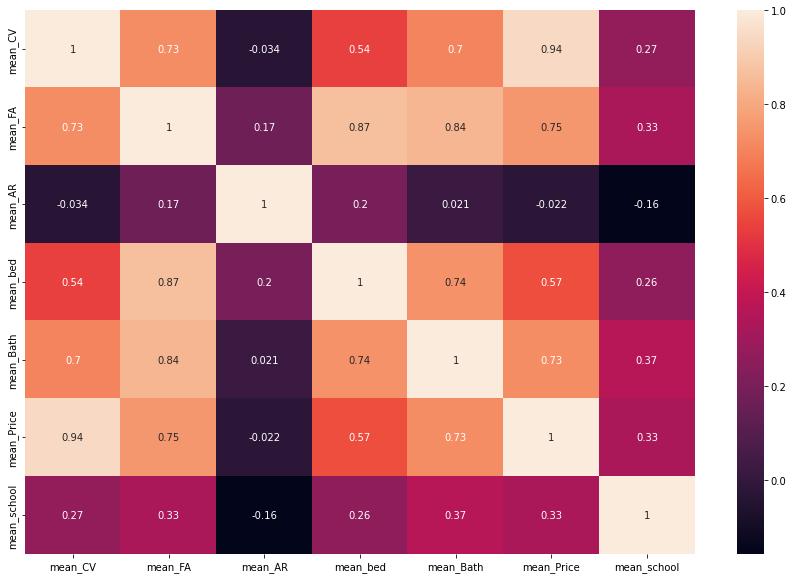

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)

In [17]:
threshold= 0.1
a = abs(cor['mean_Price'])
result = a[a>threshold]
result

mean_CV        0.943422
mean_FA        0.753399
mean_bed       0.574149
mean_Bath      0.725461
mean_Price     1.000000
mean_school    0.328206
Name: mean_Price, dtype: float64

In [18]:
df2 = df1[[c for c in df.columns if c in result]]
df2

,mean_CV,mean_FA,mean_bed,mean_Bath,mean_Price,mean_school
0,217000.0,87.0,2.0,1.0,12.577041,0.0
1,217000.0,87.0,2.0,1.0,12.577041,0.0
2,217000.0,87.0,2.0,1.0,12.577041,0.0
3,217000.0,87.0,2.0,1.0,12.577041,0.0
4,217000.0,87.0,2.0,1.0,12.577041,0.0
...,...,...,...,...,...,...
1044917,301000.0,154.0,4.0,1.0,12.736701,3.0
1044918,192500.0,180.0,4.0,1.0,12.463681,2.0
1044919,192500.0,180.0,4.0,1.0,12.463681,2.0
1044920,192500.0,180.0,4.0,1.0,12.463681,2.0


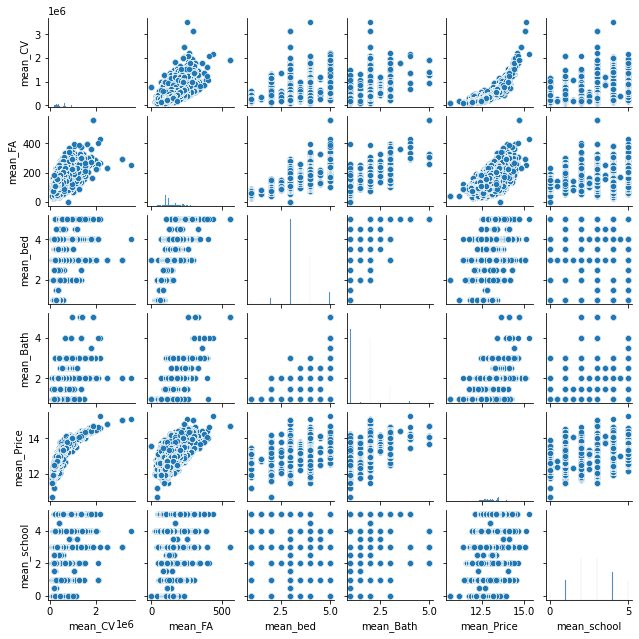

In [20]:
g = sns.pairplot(df2,height=1.5)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044922 entries, 0 to 1044921
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   mean_CV      1044922 non-null  float64
 1   mean_FA      1044922 non-null  float64
 2   mean_bed     1044922 non-null  float64
 3   mean_Bath    1044922 non-null  float64
 4   mean_Price   1044922 non-null  float64
 5   mean_school  1044922 non-null  float64
dtypes: float64(6)
memory usage: 47.8 MB


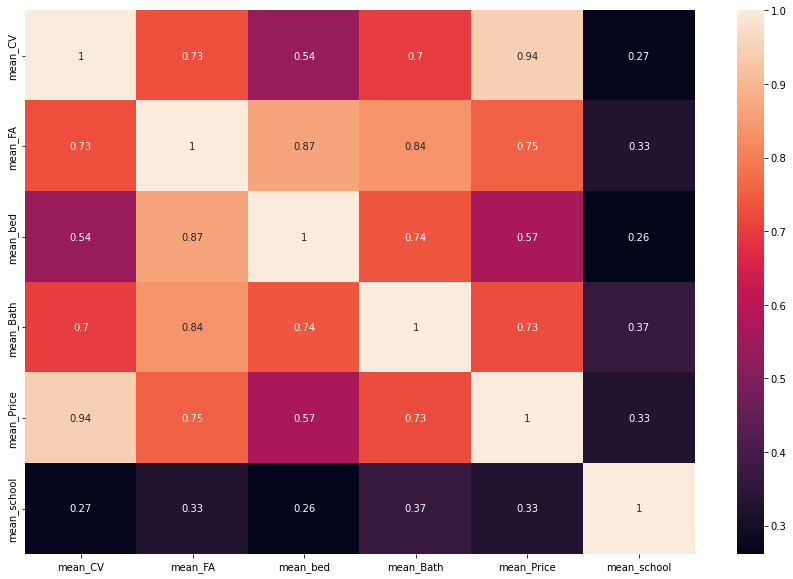

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044922 entries, 0 to 1044921
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   mean_CV      1044922 non-null  float64
 1   mean_FA      1044922 non-null  float64
 2   mean_bed     1044922 non-null  float64
 3   mean_Bath    1044922 non-null  float64
 4   mean_Price   1044922 non-null  float64
 5   mean_school  1044922 non-null  float64
dtypes: float64(6)
memory usage: 47.8 MB


In [ ]:
df2.head()

,mean_CV,mean_FA,mean_bed,mean_Bath,mean_Price,mean_school
0,217000.0,87.0,2.0,1.0,12.577041,0.0
1,217000.0,87.0,2.0,1.0,12.577041,0.0
2,217000.0,87.0,2.0,1.0,12.577041,0.0
3,217000.0,87.0,2.0,1.0,12.577041,0.0
4,217000.0,87.0,2.0,1.0,12.577041,0.0


In [ ]:
df2.shape

(1044922, 6)

In [ ]:
 #Building our model using different regression models
 # X(Independent variables) and y(target variables) 
X = df2.drop(['mean_Price'], axis=1)
Y = df2['mean_Price']

In [ ]:
print(X.shape, Y.shape)

(1044922, 5) (1044922,)


In [ ]:
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_valid.shape)

(835937, 5) (208985, 5)


In [ ]:
pd.value_counts(Y_train)

13.859527    36999
13.429848    16973
13.654753    16298
13.773646    13804
13.976779    10395
             ...  
13.919968        1
13.182831        1
14.384228        1
14.096923        1
13.107250        1
Name: mean_Price, Length: 4010, dtype: int64

In [ ]:
#Random Forest Regression Model
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_valid,Y_valid)
rf_pred =rf_regressor.predict(X_valid)
rf_score=rf_regressor.score(X_valid,Y_valid)
expl_rf = explained_variance_score(rf_pred,Y_valid)

In [ ]:
rf_RMSE = np.sqrt(mean_squared_error(Y_valid, rf_pred))

In [ ]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_valid,Y_valid)*100))

Random Forest Regression Model Score is  100


In [ ]:
#Decision Tree Regression Model
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_valid,Y_valid)
pred_tr = tr_regressor.predict(X_valid)
decision_score=tr_regressor.score(X_valid,Y_valid)
expl_tr = explained_variance_score(pred_tr,Y_valid)

In [ ]:
tr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_tr))

In [ ]:
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_valid,Y_valid)*100))

Decision tree  Regression Model Score is  100


In [ ]:
#Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,Y_train)
mlr_score = mlr.score(X_valid,Y_valid)
pred_mlr = mlr.predict(X_valid)
expl_mlr = explained_variance_score(pred_mlr,Y_valid)

In [ ]:
mlr_RMSE = np.sqrt(mean_squared_error(Y_valid, pred_mlr))

In [ ]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_valid,Y_valid)*100))

Multiple Linear Regression Model Score is  90


In [ ]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Accuracy_train_Score':[mlr_score,decision_score,rf_score],
                            'Accuracy_test_Score':[expl_mlr,expl_tr,expl_rf],
                            'RMSE: ':[mlr_RMSE,tr_RMSE,rf_RMSE]
                           })
models_score.sort_values(by='Accuracy_train_Score',ascending=False)

,Model,Accuracy_train_Score,Accuracy_test_Score,RMSE:
1,Decision Tree,0.997459,0.997454,0.025335
2,Random forest Regression,0.997451,0.997445,0.025378
0,Multiple Linear Regression,0.903733,0.892969,0.155957
